In [101]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from scipy.stats import kstest
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [102]:
df_casual = pd.read_pickle('../datos_finales/archivo_casual_est.pkl')
df_casual.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_casuales
0,invierno,2018,Enero,Lunes,festivo,nuboso,-0.486274,0.855582,-0.208909,331
1,invierno,2018,Enero,Martes,laborable,nuboso,-0.425690,0.332722,0.687550,131


In [103]:
df_registrados = pd.read_pickle('../datos_finales/archivo_registrados_est.pkl')
df_registrados.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,usuarios_registrados
0,invierno,2018,Enero,Lunes,festivo,nuboso,-0.486274,0.855582,-0.208909,654
1,invierno,2018,Enero,Martes,laborable,nuboso,-0.425690,0.332722,0.687550,670


In [104]:
df_total = pd.read_pickle('../datos_finales/archivo_total_est.pkl')
df_total.head(2)

,estacion,año,mes,dia_semana,dias_laborables,tiempo,temperatura,humedad,velocidad_viento,total_usuarios
0,invierno,2018,Enero,Lunes,festivo,nuboso,-0.486274,0.855582,-0.208909,985
1,invierno,2018,Enero,Martes,laborable,nuboso,-0.425690,0.332722,0.687550,801


In [105]:
categoricas = df_total.select_dtypes(include = 'O')
categoricas['año'] = df_total['año']
categoricas

,estacion,mes,dia_semana,dias_laborables,tiempo,año
0,invierno,Enero,Lunes,festivo,nuboso,2018
1,invierno,Enero,Martes,laborable,nuboso,2018
2,invierno,Enero,Miercoles,laborable,despejado,2018
3,invierno,Enero,Jueves,laborable,despejado,2018
4,invierno,Enero,Viernes,laborable,despejado,2018
...,...,...,...,...,...,...
725,invierno,Diciembre,Viernes,laborable,nuboso,2019
726,invierno,Diciembre,Domingo,fin de semana,nuboso,2019
727,invierno,Diciembre,Sabado,fin de semana,nuboso,2019
728,invierno,Diciembre,Lunes,laborable,despejado,2019


### Usuarios totales

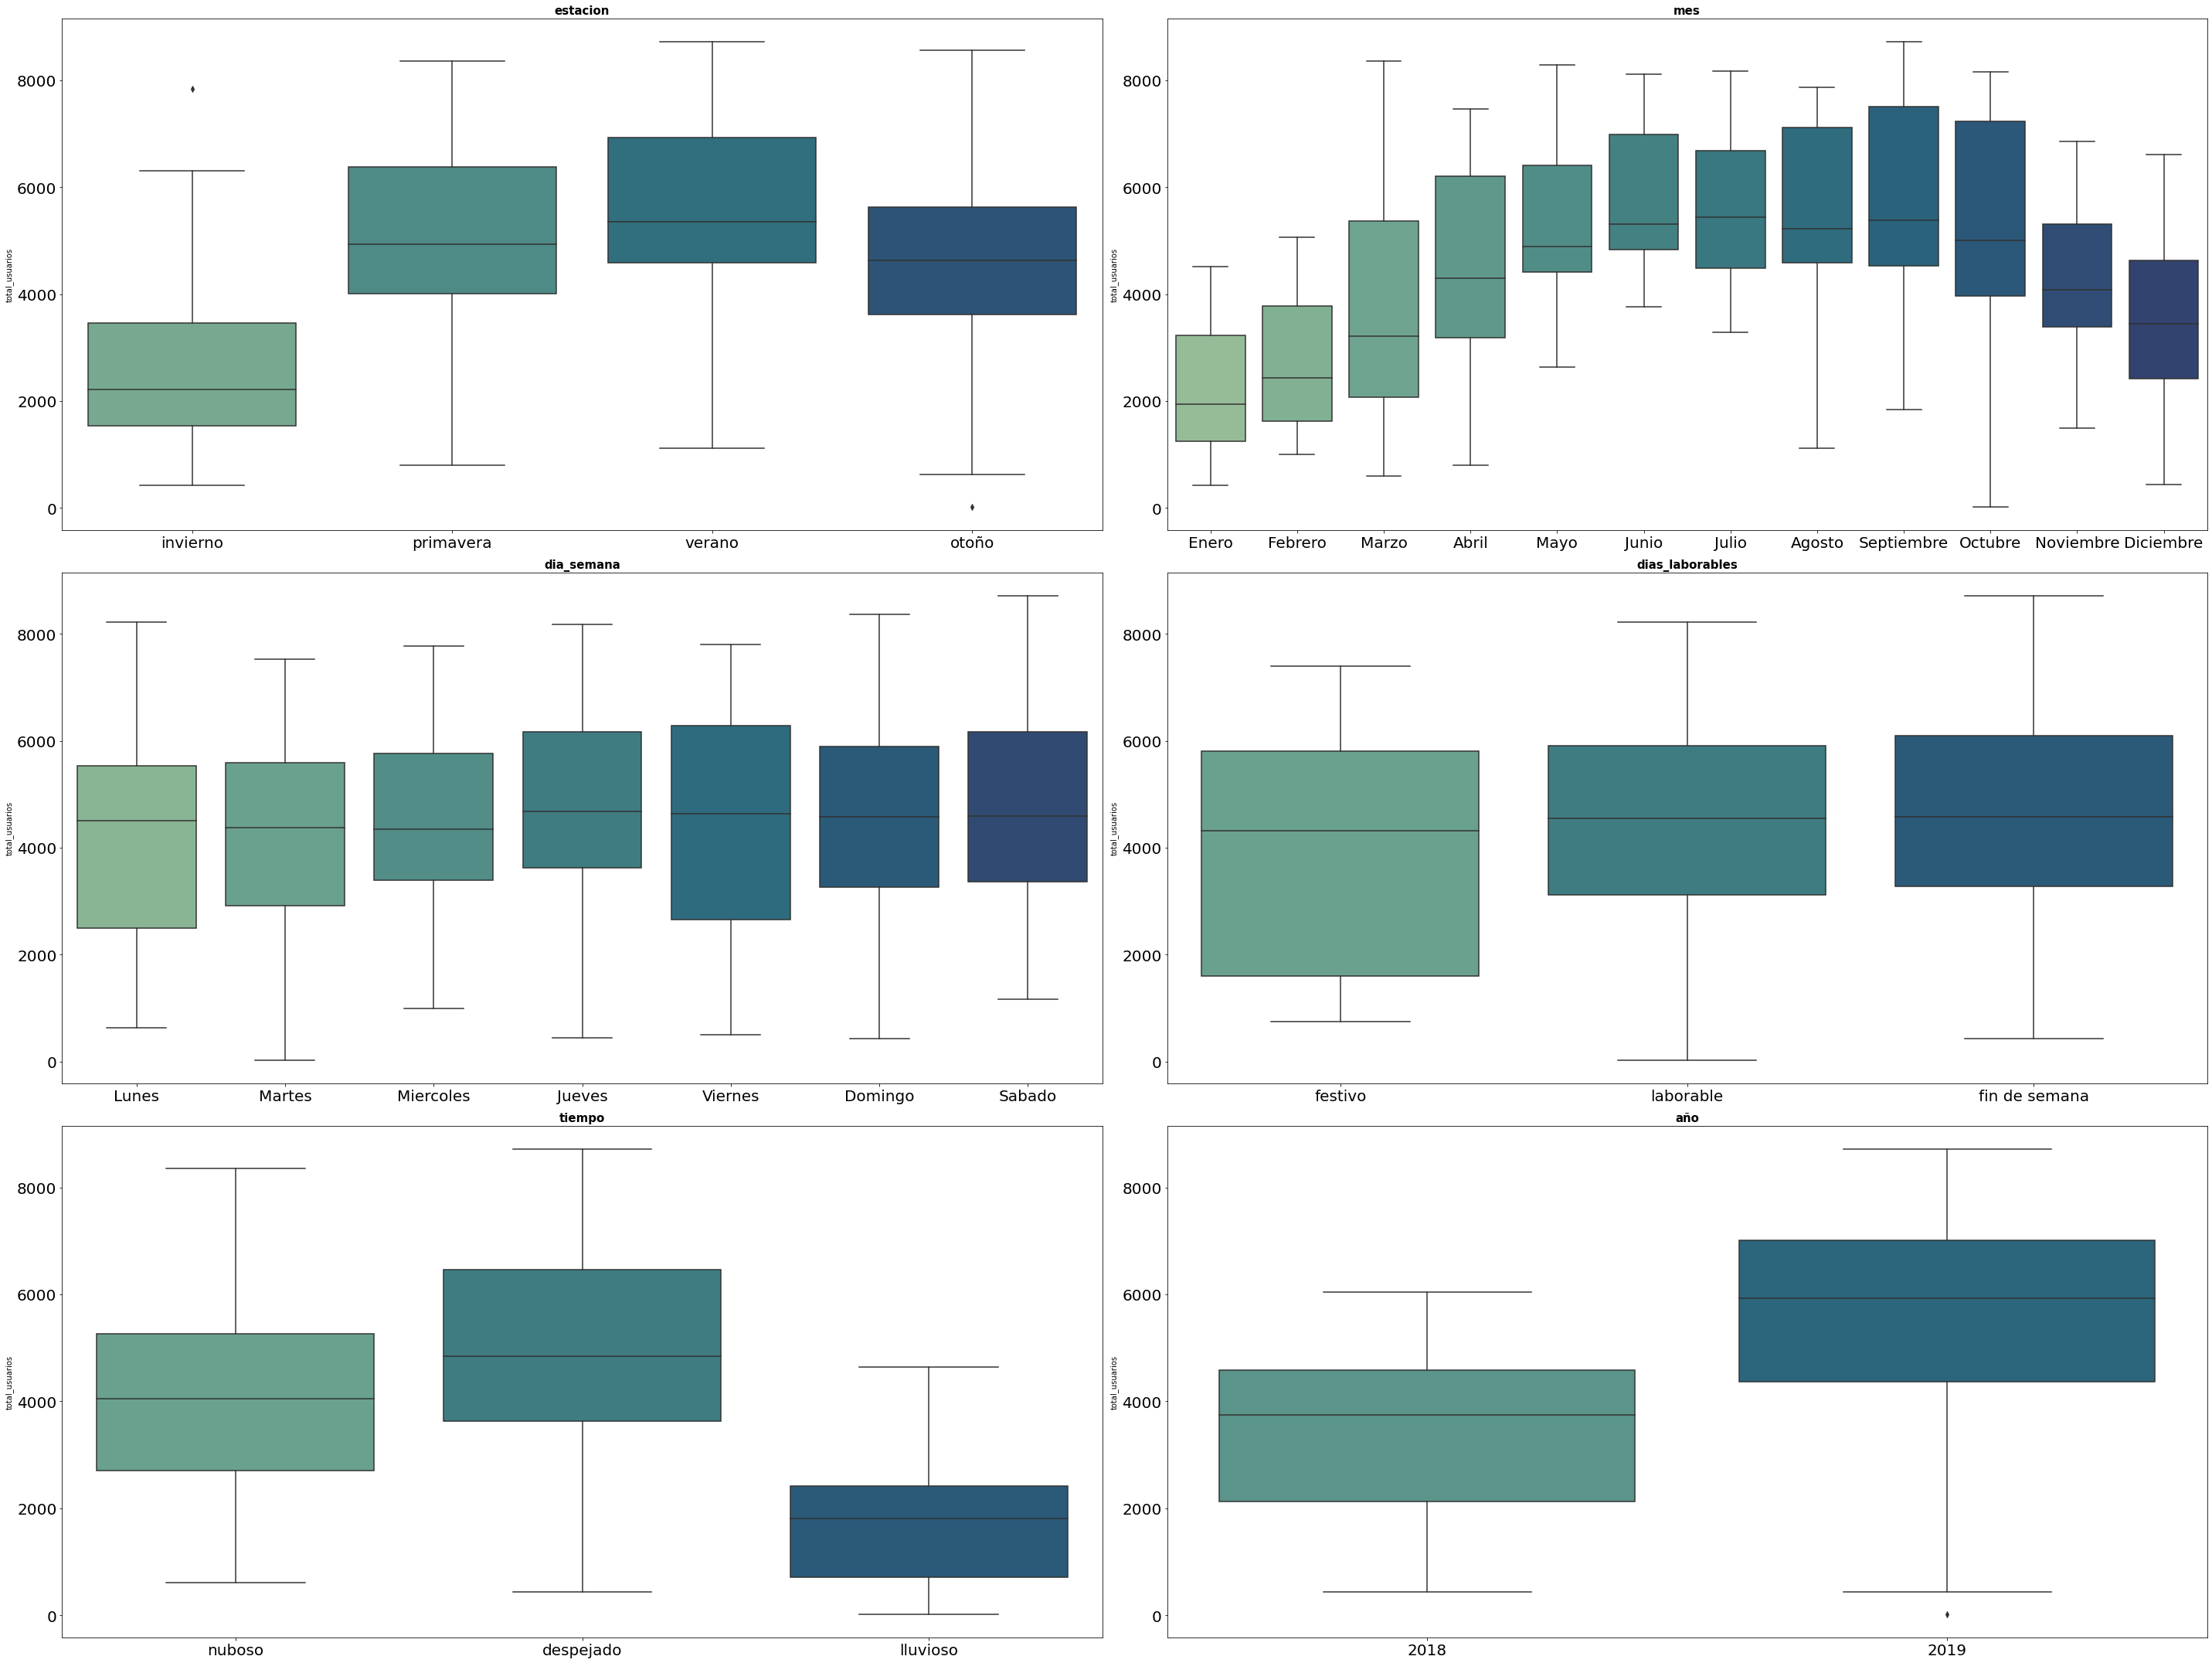

In [106]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

columnas_categoricas = categoricas.columns

axes = axes.flat

for i, colum in enumerate(columnas_categoricas): 
    sns.boxplot(y= 'total_usuarios', x= colum, data= df_total, palette= 'crest', ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

Como podemos comprobar en la visualización todas tienen orden menos las variables dia_semana y dias_laborables. Comenzamos por las que no tienen orden.

In [108]:
def getdummies(dataframe,columna):
    df_dum = pd.get_dummies(dataframe[columna], prefix_sep = "_", prefix = 'cat', dtype = int)
    dataframe[df_dum.columns] = df_dum
    dataframe.drop(columna, axis=1, inplace=True)

In [109]:
getdummies(df_total,'dia_semana')
getdummies(df_total,'dias_laborables')

Seguimos con las que tienen orden.

In [111]:
def aplicar_map(dataframe,columna,diccionario):
    dataframe[columna] = dataframe[columna].map(diccionario)

In [112]:
mapa_estacion= {'invierno':1, 'primavera':2.5, 'verano':3, 'otoño':2}
mapa_mes ={'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':6.5,
       'Agosto':6, 'Septiembre':6.5, 'Octubre':5, 'Noviembre':4, 'Diciembre':3.5}
mapa_tiempo ={'nuboso':2, 'despejado':2.5, 'lluvioso':1}
mapa_año = {2018:1,2019:2}

In [113]:
aplicar_map(df_total,'estacion',mapa_estacion)
aplicar_map(df_total,'mes',mapa_mes)
aplicar_map(df_total,'tiempo',mapa_tiempo)
aplicar_map(df_total,'año',mapa_año)

In [114]:
df_total

,estacion,año,mes,tiempo,temperatura,humedad,velocidad_viento,total_usuarios,cat_Domingo,cat_Jueves,cat_Lunes,cat_Martes,cat_Miercoles,cat_Sabado,cat_Viernes,cat_festivo,cat_fin de semana,cat_laborable
0,1.0,1,1.0,2.0,-0.486274,0.855582,-0.208909,985,0,0,1,0,0,0,0,1,0,0
1,1.0,1,1.0,2.0,-0.425690,0.332722,0.687550,801,0,0,0,1,0,0,0,0,0,1
2,1.0,1,1.0,2.5,-0.949970,-0.900337,0.685210,1349,0,0,0,0,1,0,0,0,0,1
3,1.0,1,1.0,2.5,-0.938563,-0.170632,-0.210435,1562,0,1,0,0,0,0,0,0,0,1
4,1.0,1,1.0,2.5,-0.853992,-0.901843,0.060294,1600,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,2,3.5,2.0,-0.768627,0.127049,1.721399,2114,0,0,0,0,0,0,1,0,0,1
726,1.0,2,3.5,2.0,-0.771244,-0.172705,-0.259536,3095,1,0,0,0,0,0,0,0,1,0
727,1.0,2,3.5,2.0,-0.771244,0.603476,-0.575896,1341,0,0,0,0,0,1,0,0,1,0
728,1.0,2,3.5,2.5,-0.763400,-0.680895,1.727718,1796,0,0,1,0,0,0,0,0,0,1


### Usuarios casuales

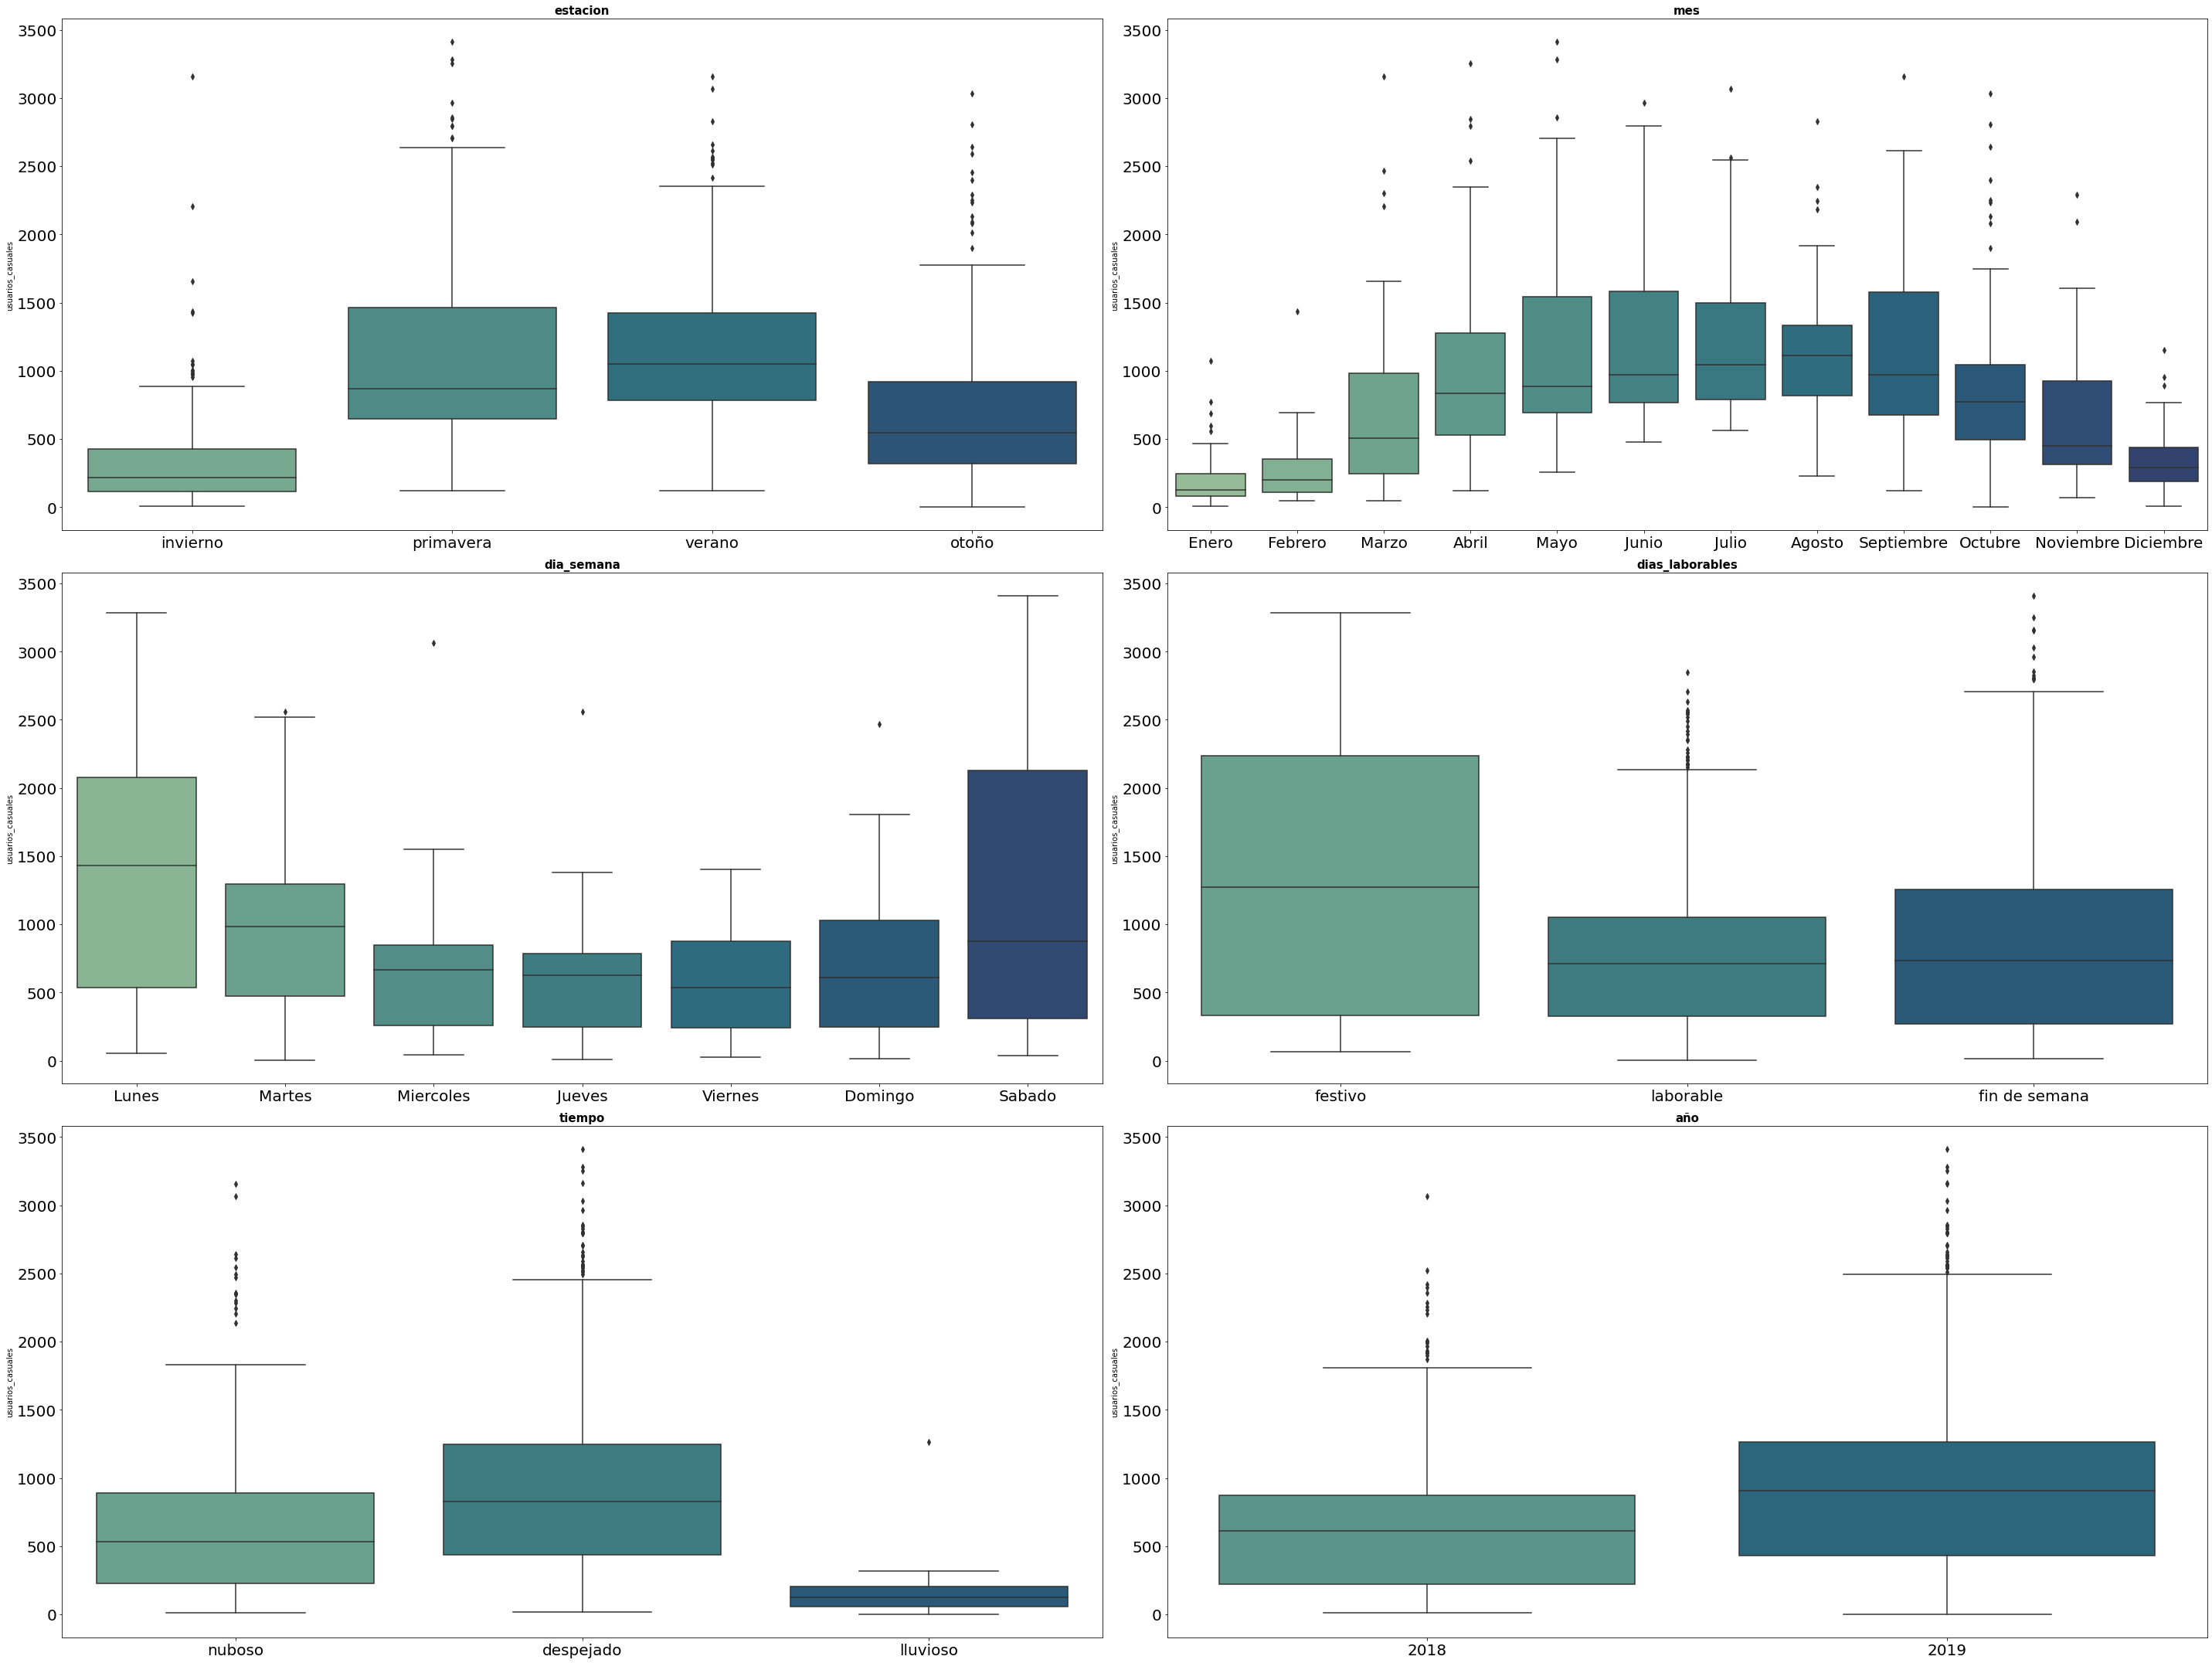

In [115]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

columnas_categoricas = categoricas.columns

axes = axes.flat

for i, colum in enumerate(columnas_categoricas): 
    sns.boxplot(y= 'usuarios_casuales', x= colum, data= df_casual, palette= 'crest', ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

### Usuarios registrados

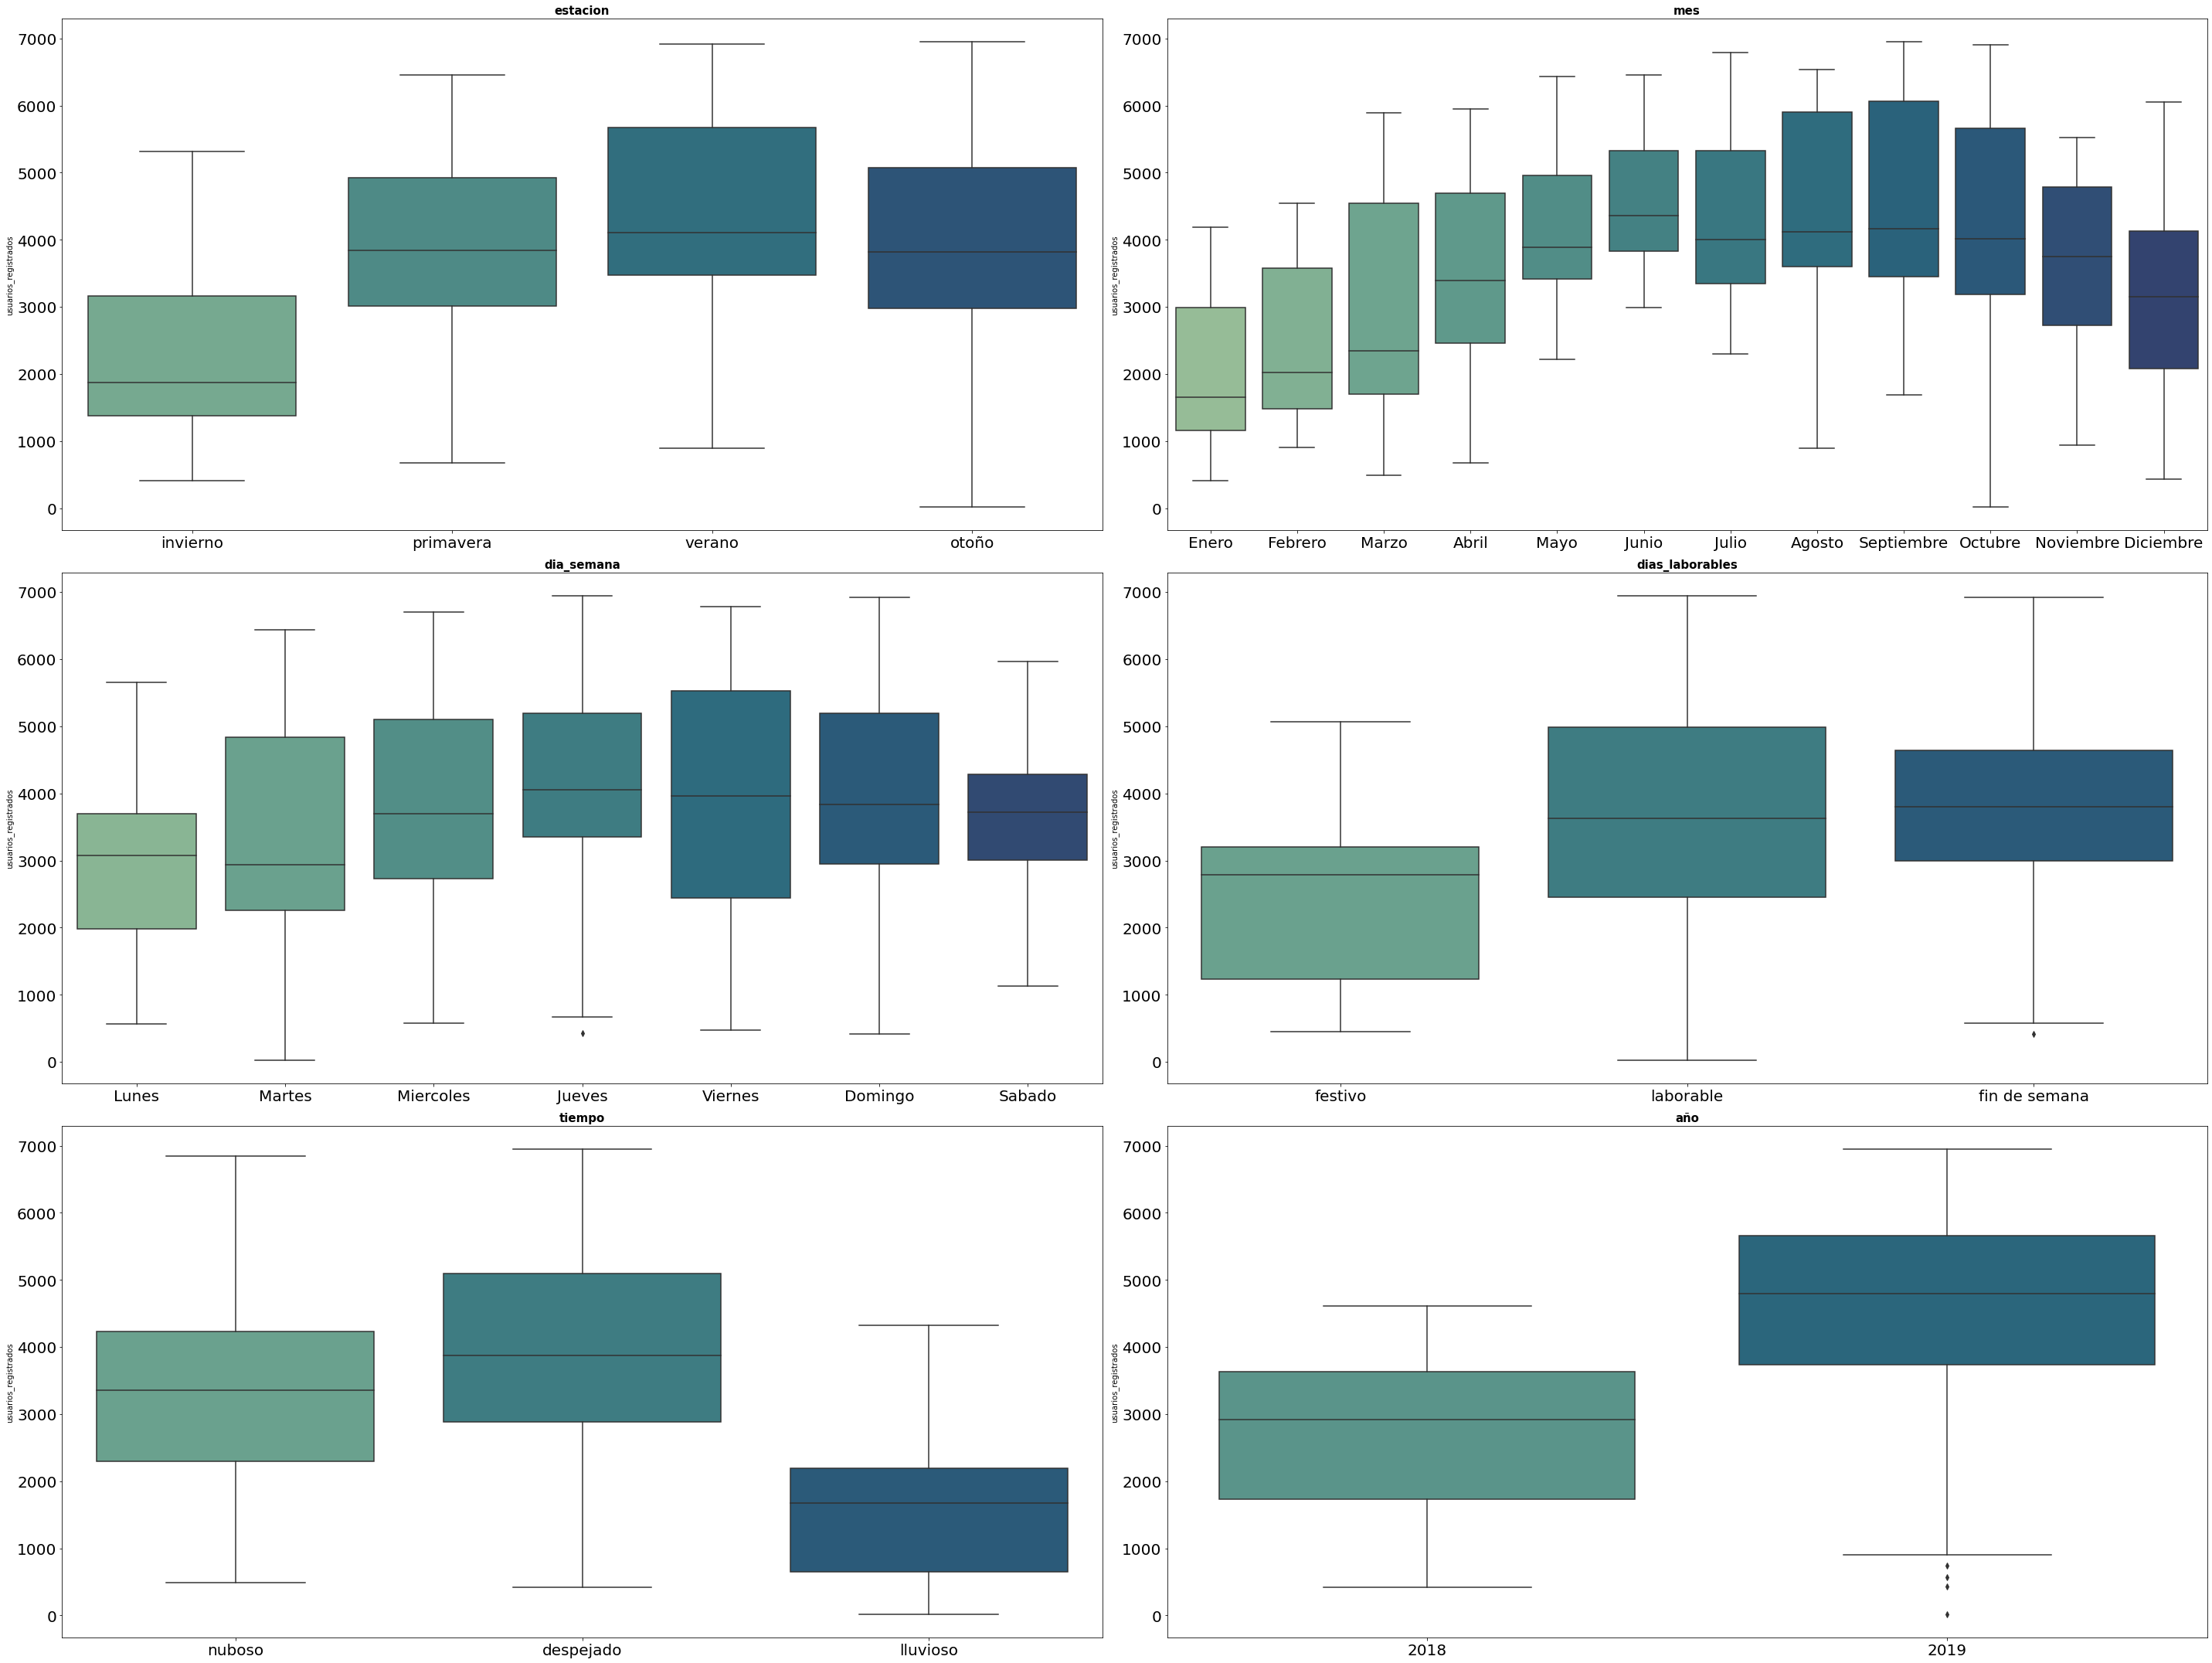

In [116]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 30))

columnas_categoricas = categoricas.columns

axes = axes.flat

for i, colum in enumerate(columnas_categoricas): 
    sns.boxplot(y= 'usuarios_registrados', x= colum, data= df_registrados, palette= 'crest', ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();